In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import random

In [2]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
x_train[0].min(),x_train[0].max()

(0, 255)

In [6]:
x_train=(x_train-0.0)/(255.0-0.0)
x_test=(x_test-0.0)/(255.0-0.0)

In [7]:
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

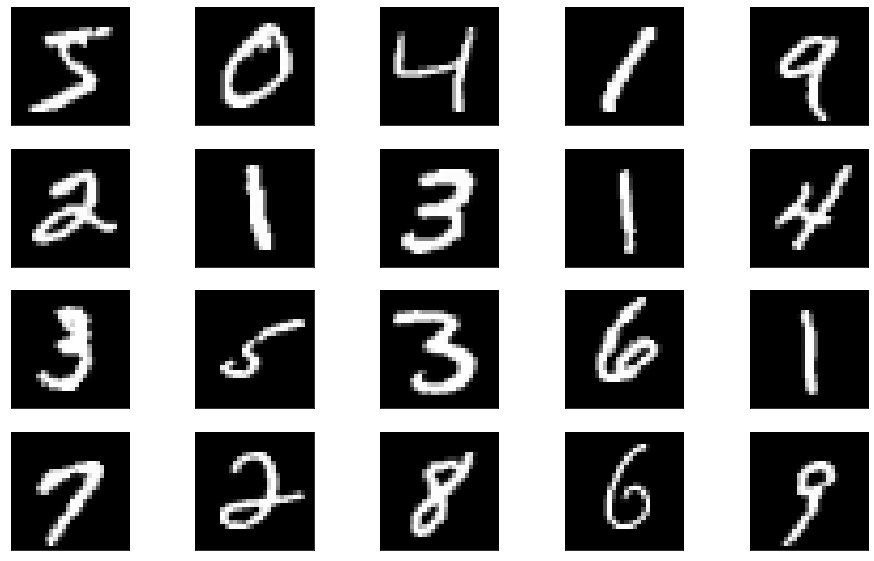

In [9]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i+1)
    plt.imshow(image,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(x_train[i],y_train[i],plt,i)
plt.show()

In [10]:
x_train=x_train.reshape((x_train.shape+(1,)))
x_test=x_test.reshape((x_test.shape+(1,)))

In [11]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [13]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation=("relu")),
    Dense(10,activation=("softmax"))
])

In [14]:
optimizer=SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2239 - accuracy: 0.9321
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0723 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0459 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0098 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0066 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 35s 19m

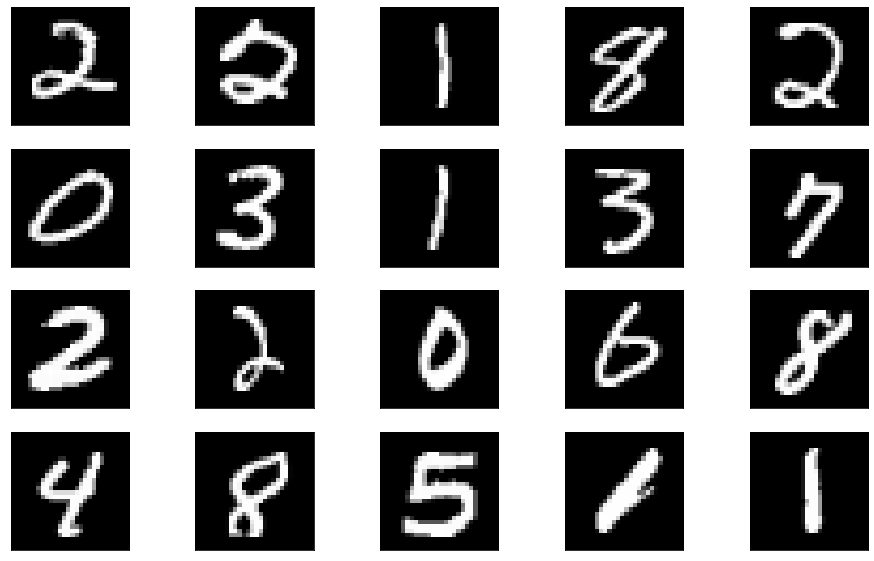

In [17]:
plt.figure(figsize=(16,10))
for i in range(20):
    image=random.choice(x_test).squeeze()
    digit=np.argmax(model.predict(image.reshape(1,28,28,1))[0],axis=-1)
    plot_digit(image,digit,plt,i)
plt.show()

In [18]:
predictions=np.argmax(model.predict(x_test),axis=-1)
accuracy_score(y_test,predictions)

0.9879

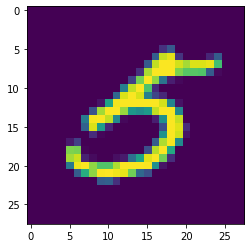

In [19]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [20]:
predicted_value=model.predict(x_test)
print("Handwritten number in image is= %d"%np.argmax(predicted_value[n]))

Handwritten number in image is= 5


In [21]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

Test loss:  0.03945300728082657
Test accuracy:  0.9879000186920166
